# Empathy Scoring using KMeans
Overview and model used:
I am using K-Means to cluster people with an overall sense of empathy and grading them on a scale of 1-5 using features selected from the dataset of the first question. I am using clustering for the following reasons:
Clustering avoids overfitting the data as compared to other models and gives us a more real-world approach to similarity between objects. Occam's razor applied to my approach. For the current case of grading a person on a fuzzy concept like Empathy, rather than hard classifying a person we can get approximate results of if the person is empathetic enough for the Alzheimer's Patients. Most of the time the problems we deal with in machine learning are very general and hard to quantize strictly, and hence a clustering approach spoke more to me than any other advanced method. Although there can be a lot of improvement further in my approach. Let's dive in on how my model works!

Lets import everything that we need at once!

In [147]:
import os
import sys
import traceback
import time
from functools import reduce
from collections import Counter
import json

import pygal
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from progress.bar import ChargingBar
import seaborn as sns
from IPython.display import SVG, HTML

from cluster import ClusterAnalysis, verbose_print

In [148]:
#We choose the Features we want here.
#Pre-selected features according to choice.
features = [
             'Giving', 
             'Musical', 
             'Horror', 
             'Romantic',  
             'Gender', 
             'Compassion to animals', 
             'Empathy', 
             'Keeping promises', 
             'Reading', 
             'Pets', 
             'Ageing', 
             'Daily events', 
             'Village - town',
             'Action',
             'Fake',
             'Only child'
]
#We read the data for selected features and drop nan values.
verbose_print("\nCleaning, Preprocessing data, dropping NaN values,converting non-int columns into corresponding values.", color = 36)
data = pd.read_csv('responses.csv', encoding = 'utf-8')[features].dropna()
print(data)
examples = []


Cleaning, Preprocessing data, dropping NaN values,converting non-int columns into corresponding values.
      Giving  Musical  Horror  Romantic  Gender  Compassion to animals  \
0        4.0      1.0     4.0       4.0  female                    5.0   
1        2.0      2.0     2.0       3.0  female                    4.0   
2        5.0      5.0     3.0       2.0  female                    4.0   
3        1.0      1.0     4.0       3.0  female                    2.0   
4        3.0      3.0     4.0       2.0  female                    3.0   
5        3.0      3.0     5.0       2.0    male                    5.0   
6        5.0      2.0     2.0       3.0  female                    5.0   
7        3.0      2.0     4.0       2.0    male                    5.0   
8        1.0      4.0     1.0       4.0  female                    4.0   
9        4.0      5.0     2.0       5.0  female                    5.0   
10       3.0      3.0     5.0       3.0  female                    5.0   
11     

In [149]:
#Converting categories into binary values for the two following columns.
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})
data['Village - town'] = data['Village - town'].map({'city': 1, 'village': 0})
data['Only child'] = data['Only child'].map({'yes': 0, 'no': 1})
print(data)

      Giving  Musical  Horror  Romantic  Gender  Compassion to animals  \
0        4.0      1.0     4.0       4.0       1                    5.0   
1        2.0      2.0     2.0       3.0       1                    4.0   
2        5.0      5.0     3.0       2.0       1                    4.0   
3        1.0      1.0     4.0       3.0       1                    2.0   
4        3.0      3.0     4.0       2.0       1                    3.0   
5        3.0      3.0     5.0       2.0       0                    5.0   
6        5.0      2.0     2.0       3.0       1                    5.0   
7        3.0      2.0     4.0       2.0       0                    5.0   
8        1.0      4.0     1.0       4.0       1                    4.0   
9        4.0      5.0     2.0       5.0       1                    5.0   
10       3.0      3.0     5.0       3.0       1                    5.0   
11       1.0      1.0     3.0       3.0       1                    2.0   
12       2.0      3.0     1.0       3.

We have now cleaned the data for unwanted values and converted the columns:
- Gender: 0-male, 1-female
- Village - town: 0-city, 1-village
- Only child : yes-0, no-1

And we transpose the dataset into the form [no_of_features x no_of_examples]by transposing it.

In [150]:
#Creating the feature matrix and converting it to a numpy array.
# for item in features:
#     examples.append(data[item])
# dataset = np.array(examples)
# dataset = np.transpose(dataset)
# print(dataset)

#split data into 80:20
data_train, data_test = train_test_split(data, test_size = 0.2) 
print(data_train.shape)

(763, 16)


We are ready to perform clustering now. We create an instance of the class ClusterAnalysis and pass the required variabls into it, K is clusters = 5, data_train, seeds[1,2,3,4,5].
ClusterAnalysis.performclustering() does KMeans on the input data.

Before we move further we want to see if the features we have selected carefully, how they correlate to each other. The lesser correlation they have the better.

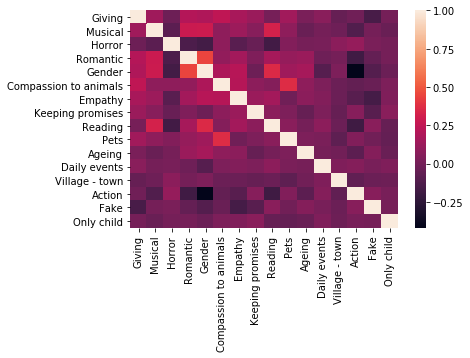

In [151]:
df = pd.DataFrame(data_train)
df = df.corr()
ax = sns.heatmap(df)

This is good! The features are less correlated and this means the features are very healthy to be considered.

In [152]:
c_analyse = ClusterAnalysis(5, data_train.values, seeds = [1,2,3,4,5])
cluster_points, cluster_centers = c_analyse.performclustering()
verbose_print(cluster_centers)

[[ 2.72151899  3.15822785  1.94936709  3.8164557   0.79113924  3.43037975
   4.15189873  3.97468354  4.01265823  1.67088608  2.38607595  3.08860759
   0.71518987  2.91139241  2.00632911  0.79113924]
 [ 3.30167598  3.68715084  2.58100559  3.77094972  0.75977654  4.32402235
   4.18994413  4.12849162  4.37988827  4.53631285  2.06145251  3.33519553
   0.62011173  3.62569832  2.17877095  0.72625698]
 [ 2.26056338  1.88732394  3.38028169  2.55633803  0.14788732  3.06338028
   3.35211268  3.78873239  2.05633803  1.88028169  2.33802817  2.99295775
   0.77464789  4.03521127  2.33802817  0.74647887]
 [ 3.11940299  2.02985075  3.05223881  3.08955224  0.35074627  4.3358209
   3.47761194  3.97014925  1.79850746  4.32089552  1.70149254  2.99253731
   0.64179104  4.02238806  2.01492537  0.8358209 ]
 [ 3.31333333  2.6         3.08666667  4.00666667  0.82666667  4.56666667
   4.04        4.06666667  3.18        4.12666667  4.17333333  2.96666667
   0.73333333  3.18666667  2.18        0.70666667]]


Our cluster points are obtained now we can see how the clusters are spread and what each cluster signifies. We can see a few plots here which lets us see what traits are dominant in wach cluster.

In [154]:
averages = []
for item in cluster_points:
    local_avg = [0 for i in range(len(features))]
    for item2 in item:
        for it, item3 in enumerate(item2):
            local_avg[it] += item3
    averages.append([(i / len(item)) for i in local_avg])

In [155]:
print(averages)

line_chart = pygal.HorizontalBar()
line_chart.title = 'Averages for each feature:'
for it, item in enumerate(features):
    line_chart.add(item, averages[3][it]) # We are choosing first cluster here. You can choose whichever you want.

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""
HTML(html_pygal.format(pygal_render=line_chart.render()))

[[2.721518987341772, 3.1582278481012658, 1.9493670886075949, 3.8164556962025316, 0.79113924050632911, 3.4303797468354431, 4.1518987341772151, 3.9746835443037973, 4.0126582278481013, 1.6708860759493671, 2.3860759493670884, 3.0886075949367089, 0.71518987341772156, 2.9113924050632911, 2.0063291139240507, 0.79113924050632911], [3.3016759776536313, 3.6871508379888267, 2.5810055865921786, 3.7709497206703912, 0.75977653631284914, 4.3240223463687153, 4.1899441340782122, 4.1284916201117321, 4.3798882681564244, 4.5363128491620115, 2.0614525139664805, 3.3351955307262569, 0.62011173184357538, 3.6256983240223462, 2.1787709497206702, 0.72625698324022347], [2.26056338028169, 1.8873239436619718, 3.380281690140845, 2.556338028169014, 0.14788732394366197, 3.063380281690141, 3.352112676056338, 3.788732394366197, 2.056338028169014, 1.880281690140845, 2.3380281690140845, 2.992957746478873, 0.77464788732394363, 4.035211267605634, 2.3380281690140845, 0.74647887323943662], [3.1194029850746268, 2.0298507462686

The above list of lists gives us the averages of each feature over the whole cluster. Now we can using these average values we can evaluate a overall score for each cluster based on the properties and tehir impact on the empathy prediction.

In [156]:
cluster_scores = []
for item in averages:
    score = item[0] \
    + item[1] \
    - item[2] \
    + item[3] \
    + item[4] \
    + item[5] \
    + item[6] \
    + item[7] \
    + item[8] \
    + item[9] \
    + item[10] \
    + item[11] \
    + item[12] \
    - item[13] \
    - item[14] \
    + item[15] 
    cluster_scores.append(score)

print('\n', cluster_scores)

'''
    Labels VS Corresponsing Clusters
        1: Cluster2,
        2: Cluster3,
        3: Cluster4,
        4: Cluster1,
        5: Cluster0
'''

verbose_print('\nLabels VS Corresponding Clusters')
verbose_print('Score 1: Cluster3\nScore 2: Cluster4\nScore 3: Cluster5\nScore 4: Cluster2\nScore 5: Cluster1', color = 36)

prediction_labels = c_analyse.predict(data_test)
scores = []
for item in prediction_labels:
    if item == 0:
        scores.append(5)
    elif item == 1:
        scores.append(4)
    elif item == 2:
        scores.append(1)
    elif item == 3:
        scores.append(2)
    elif item == 4:
        scores.append(3) 
verbose_print("\nResults:")
verbose_print(scores, color = 37)
verbose_print('\nLabels Count')
verbose_print(dict(Counter(scores)), color = 37)
c = dict(Counter(scores))

bar_chart = pygal.HorizontalBar()
bar_chart.title = 'empathy count for people'

for item in c:
    bar_chart.add(str(item), int(c[item]))

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""
HTML(html_pygal.format(pygal_render=bar_chart.render()))


 [27.841772151898738, 31.435754189944131, 18.091549295774648, 23.574626865671643, 30.853333333333335]

Labels VS Corresponding Clusters
Score 1: Cluster3
Score 2: Cluster4
Score 3: Cluster5
Score 4: Cluster2
Score 5: Cluster1

Results:
[5, 5, 1, 1, 2, 2, 1, 2, 1, 4, 2, 3, 2, 3, 5, 5, 4, 1, 4, 1, 5, 4, 1, 2, 5, 2, 5, 3, 2, 3, 4, 3, 2, 3, 1, 5, 4, 1, 3, 4, 1, 2, 5, 5, 4, 4, 5, 4, 5, 5, 3, 4, 5, 3, 2, 4, 3, 4, 4, 5, 2, 1, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 1, 5, 4, 5, 2, 4, 2, 2, 3, 2, 1, 1, 1, 5, 3, 3, 4, 2, 2, 5, 2, 1, 1, 2, 2, 4, 5, 5, 1, 5, 3, 4, 4, 3, 3, 1, 5, 2, 4, 4, 5, 2, 2, 2, 3, 1, 5, 3, 4, 2, 1, 5, 3, 1, 2, 1, 3, 1, 5, 3, 3, 5, 4, 5, 5, 4, 5, 2, 3, 4, 4, 2, 1, 5, 3, 1, 4, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3, 4, 3, 4, 1, 5, 5, 3, 4, 1, 1, 1, 3, 4, 1, 3, 5, 4, 4, 5, 4, 3, 5, 4, 3, 4, 1, 4, 3, 3, 3, 1]

Labels Count
{5: 38, 1: 37, 2: 36, 4: 40, 3: 40}
